<a href="https://colab.research.google.com/github/wernenveiga/fundamentos-de-ciencia-de-dados/blob/main/Exame_Pr%C3%A1tico_Sess%C3%A3o_4_Correla%C3%A7%C3%A3o_e_Covari%C3%A2ncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Correlação e Covariância

##Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

##Arquivo

In [3]:
arquivo = '/content/salarios.csv'
df_salarios = pd.read_csv(arquivo)
df_salarios.columns

Index(['AGE', 'WORKCLASS', 'EDUCATION', 'EDUCATIONNUM', 'MARITALSTATUS',
       'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'HOURSPERWEEK', 'ABOVE50K',
       'INCOME'],
      dtype='object')

###Pergunta 1:
Crie um Data Frame que contenha apenas as colunas AGE, EDUCATIONNUM, HOURSPERWEEK e INCOME. Crie uma matrix de correlações e indique qual variável tem a correlação mais alta com INCOME e o valor aproximado da correlação.

In [4]:
colunas = ['AGE', 'EDUCATIONNUM', 'HOURSPERWEEK', 'INCOME']

In [5]:
df_salarios1 = pd.DataFrame(df_salarios, columns=colunas)

In [7]:
df_salarios1 = df_salarios1.dropna()

In [9]:
correlacoes = df_salarios1.corr()
correlacoes

,AGE,EDUCATIONNUM,HOURSPERWEEK,INCOME
AGE,1.000000,0.036527,0.068756,0.193978
EDUCATIONNUM,0.036527,1.000000,0.148123,0.277894
HOURSPERWEEK,0.068756,0.148123,1.000000,0.187528
INCOME,0.193978,0.277894,0.187528,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9fc3914d0>,
      dtype=object)

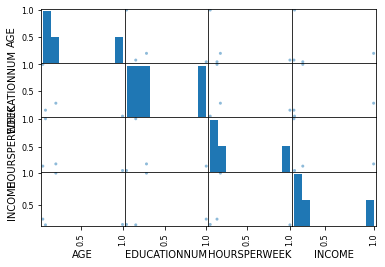

In [10]:
scatter_matrix(correlacoes) #01

###Pergunta 2:
Crie uma regressão linear que calcule o valor da variável INCOME baseado no valor da variável EDUCATIONNUM. Qual o valor da Média do Erro Padrão  ao (Mean Error)?

Dica: Para extrair a raiz quadrada de um número, use um dos métodos a seguir:

a) x**(1/2)

b) import math

    math.sqrt(x)

In [11]:
import math

In [13]:
income = df_salarios1['INCOME']

In [14]:
edu = df_salarios1['EDUCATIONNUM']

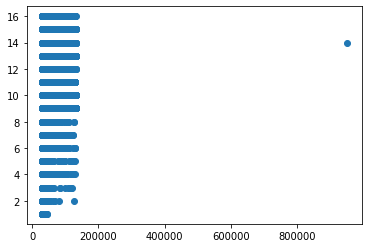

In [16]:
plt.scatter(income, edu)
plt.show()

In [17]:
np.corrcoef(income, edu)

array([[1.        , 0.27789377],
       [0.27789377, 1.        ]])

In [18]:
lm1 = linear_model.LinearRegression()
lm1.fit(edu[:, np.newaxis], income)
lm1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression()

In [32]:
x_prev = edu
y_prev = lm1.predict(x_prev[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [22]:
print("MSE: %.2f" % math.sqrt(mean_squared_error(income, y_prev)))#MSE Média dos erros quadrados


MSE: 22582.52


###Pergunta 3:
Crie uma regressão linear que calcule o valor da variável INCOME baseado no valor da variável EDUCATIONNUM. Qual o valor do R2?

In [23]:
print("R2 : %.2f" % r2_score(income, y_prev)) #coeficiente de correlação

R2 : 0.08


###Pergunta 4:
Crie uma regressão linear que calcule o valor da variável INCOME baseado no valor da variável EDUCATIONNUM. Qual o valor aproximado de INCOME quando o EDUCATIONNUM for 13?

In [82]:
df_pref = pd.DataFrame({'x': x_prev, 'y': y_prev})

In [83]:
df_pref[df_pref.x == 13]["y"]

0        51403.129381
1        51403.129381
4        51403.129381
9        51403.129381
11       51403.129381
             ...     
32530    51403.129381
32531    51403.129381
32533    51403.129381
32536    51403.129381
32538    51403.129381
Name: y, Length: 5355, dtype: float64

###Pergunta 5:
Crie uma tabela de contingência entre as variáveis MARITALSTATUS e ABOVE50K. Considerando que a variável Above50K indica se uma pessoa ganha mais que 50.000 ao ano (1) ou não (0) e o valor "Married" como pessoas casadas e "Not Married" como pessoas não casadas, responda qual a quantidade de pessoas casadas que ganham acima de 50,000 ao ano?

In [46]:
from sklearn.metrics import matthews_corrcoef

In [47]:
tabela_contingencia = pd.crosstab(df_salarios['MARITALSTATUS'], df_salarios['ABOVE50K'])
tabela_contingencia

ABOVE50K,0,1
MARITALSTATUS,,
Married,9593,6817
Not Married,15131,1020


###Pergunta 6:
Crie uma tabela de contingência entre as variáveis MARITALSTATUS e ABOKE50K. Considerando que a variável Above50K indica se uma pessoa ganha mais que 50.000 ao ano (1) ou não (0) e o valor "Married" como pessoas casadas e "Not Married" como pessoas não casadas, responda qual a quantidade de pessoas casadas?

In [48]:
9593 + 6817

16410

###Pergunta 7:
Qual o valor aproximado do coeficiente de Matthews das variáveis MARITALSTATUS e ABOVE50K?

Para executar este exercício você precisará criar variáveis lógicas baseado nos valores das variáveis em questão. Para aprender como fazer isso, leia o código disponibilizado na demonstração prática de Coeficiente de Matthews.

In [64]:
casado = df_salarios['MARITALSTATUS'] == 'Married'
acima50k = df_salarios['ABOVE50K'] == 1
naocasado = df_salarios['MARITALSTATUS'] == 'Not Married'
abaixo50k = df_salarios['ABOVE50K'] == '0'
acima50k

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: ABOVE50K, Length: 32561, dtype: bool

In [65]:
matthews_corrcoef(casado, acima50k)

0.41199057905748016

###Pergunta 8:
Qual o coeficiente de Matthews das variáveis SEX e ABOVE50K?

Para executar este exercício você precisará criar variáveis lógicas baseado nos valores das variáveis em questão. Para aprender como fazer isso, leia o código disponibilizado na demonstração prática de Coeficiente de Matthews.

In [74]:
df_salarios = df_salarios.dropna()

In [75]:
sexo = df_salarios['SEX'] == 'Male'

In [77]:
matthews_corrcoef(sexo, acima50k)

0.21596843953621198

###Pergunta 9:
Qual o coeficiente de Matthews das variáveis RACE e ABOVE50K? Neste caso, crie uma nova coluna que indique se o campo RACE é igual a "White" ou não.

Para executar este exercício você precisará criar variáveis lógicas baseado nos valores das variáveis em questão. Para aprender como fazer isso, leia o código disponibilizado na demonstração prática de Coeficiente de Matthews.

In [78]:
race = df_salarios['RACE'] == 'White'

In [79]:
matthews_corrcoef(race, acima50k)

0.08532427219154463